# Práctica 6 - figures

date: 07/11/2023  
File: Chehade_practica6_figures.ipynb
Author : Pablo Naim Chehade   
Email: pablo.chehade.villalba@gmail.com  
GitHub: https://github.com/Lupama2  

In [22]:
#Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

#Hago los gráficos interactivos
%matplotlib ipympl

#Fuente y tamaño de los caracteres en los gráficos
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 17}
matplotlib.rc('font', **font)

## Ejercicio 1

In [23]:
alpha_vec = np.array([0.12, 0.14, 0.16, 0.18])
N_vec = np.array([500, 1000, 2000, 4000])

In [24]:
#Imprimo una tabla con los valores de f_col

f_conv_seq_matrix = np.load("resultados/ej1_f_conv_seq_matrix.npy")
f_conv_par_matrix = np.load("resultados/ej1_f_conv_par_matrix.npy")



In [25]:

print("Tabla de f_conv para iteración secuencial")
print(r"N\alpha", end = '\t')
for alpha in alpha_vec:
    print(f"{alpha:.2f}", end = '\t')
print()
for i in range(len(N_vec)):
    print(N_vec[i], end = '\t')
    for j in range(len(alpha_vec)):
        print(f"{f_conv_seq_matrix[i,j]:.4f}", end = '\t')
    print()


print("Tabla de f_conv para iteración paralela")
print(r"N\alpha", end = '\t')
for alpha in alpha_vec:
    print(f"{alpha:.2f}", end = '\t')
print()
for i in range(len(N_vec)):
    print(N_vec[i], end = '\t')
    for j in range(len(alpha_vec)):
        print(f"{f_conv_par_matrix[i,j]:.4f}", end = '\t')
    print()


Tabla de f_conv para iteración secuencial
N\alpha	0.12	0.14	0.16	0.18	
500	1.0000	1.0000	1.0000	1.0000	
1000	1.0000	1.0000	1.0000	1.0000	
2000	1.0000	1.0000	1.0000	1.0000	
4000	1.0000	1.0000	1.0000	1.0000	
Tabla de f_conv para iteración paralela
N\alpha	0.12	0.14	0.16	0.18	
500	0.9667	0.9143	0.7125	0.5000	
1000	0.9333	0.8643	0.4062	0.1111	
2000	0.9625	0.7071	0.2437	0.0306	
4000	0.8875	0.5250	0.0688	0.0000	


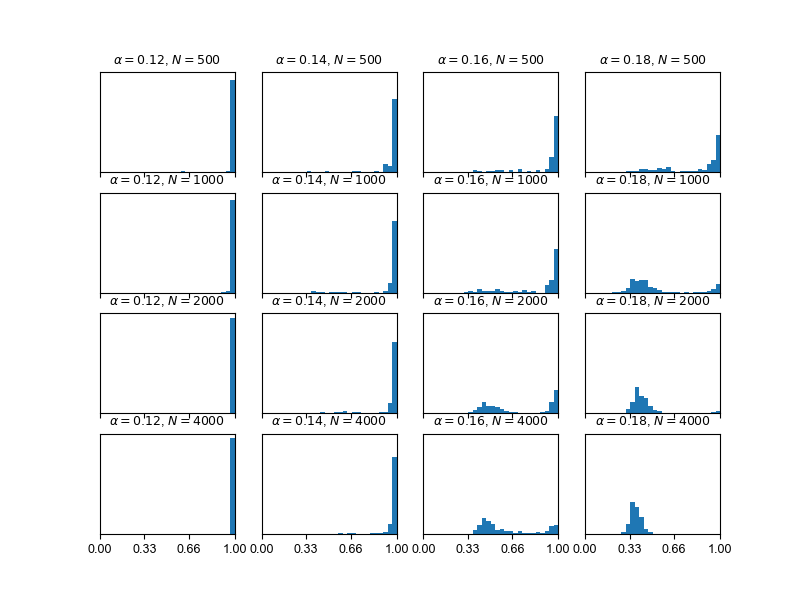

In [26]:
# Grafico un histograma de todos los overlaps

fig, ax = plt.subplots(len(alpha_vec),len(N_vec), figsize = (8,6), sharex=True, sharey=True)

for i in range(len(N_vec)):
    for j in range(len(alpha_vec)):
        alpha = alpha_vec[i]
        N = N_vec[j]
        p = int(alpha*N)
        overlap_vec = np.load(f"resultados/ej1_overlap_vec_seq_{i}{j}.npy")

        ax[i,j].hist(overlap_vec, range = (0,1), bins = 30, density = True)
        ax[i,j].set_xlim([0,1])
        #Agrego titulo de tamaño 9
        ax[i,j].set_title( fr'$\alpha = {alpha_vec[j]}$, $N = {N_vec[i]}$', fontsize = 9)
        # ax[i,j].set_ylabel('Frecuencia')
        #Saco los ticks y labels del eje y
        ax[i,j].set_yticks([])
        ax[i,j].set_yticklabels([])
        #Uso tick labels en x en 0, 0.33, 0.66 y 1 con 2 decimales
        ax[i,j].set_xticks([0, 0.33, 0.66, 1])
        #Achico el tamaño de los labels
        ax[i,j].tick_params(axis='x', labelsize=9)
        
        


plt.show()

#Guardo figura
fig.savefig("ej1_histograma.png", bbox_inches='tight')

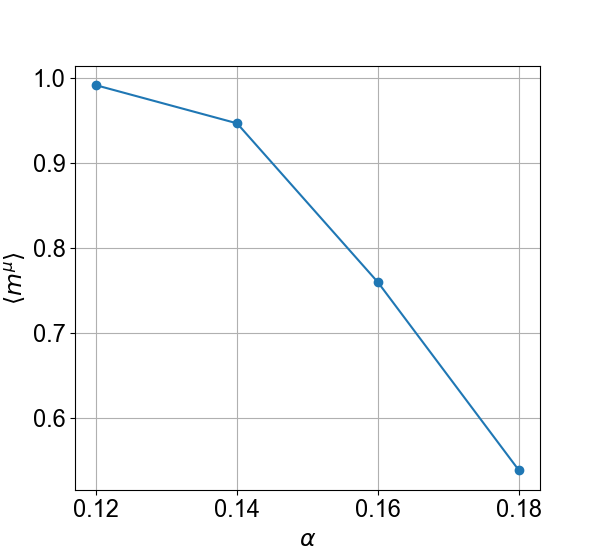

In [27]:
#Calculo el promedio de los overlaps para cada alpha
overlap_mean_vec = np.zeros(len(alpha_vec))
overlap_std_vec = np.zeros(len(alpha_vec))

for j in range(len(alpha_vec)):
    overlap_var_vec = 0
    for i in range(len(N_vec)):
        alpha = alpha_vec[i]
        N = N_vec[j]
        overlap_vec = np.load(f"resultados/ej1_overlap_vec_seq_{i}{j}.npy")

        overlap_mean_vec[j] += np.mean(overlap_vec)
        overlap_var_vec += (np.std(overlap_vec)/np.sqrt(N))**2

    overlap_mean_vec[j] /= len(N_vec)
    overlap_std_vec[j] = np.sqrt(overlap_var_vec/len(N_vec))

#Grafico el promedio de los overlaps para cada alpha
fig, ax = plt.subplots(figsize = (6,5.5))

# ax.errorbar(alpha_vec, overlap_mean_vec, yerr = overlap_std_vec, fmt = 'o-', capsize = 5)
ax.plot(alpha_vec, overlap_mean_vec, '-o', color = 'tab:blue')

ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\langle m^\mu \rangle$')
ax.grid()

plt.show()

#Guardo figura
fig.savefig("ej1_overlap_mean.png", bbox_inches='tight')

## Ejercicio 2

In [28]:
#Cargo datos
T_vec = np.load("resultados/ej2_T_vec.npy")
overlap_mean_vec = np.load("resultados/ej2_overlap_mean_vec.npy")
# overlap_std_vec = np.load("resultados/ej2_overlap_std_vec.npy")

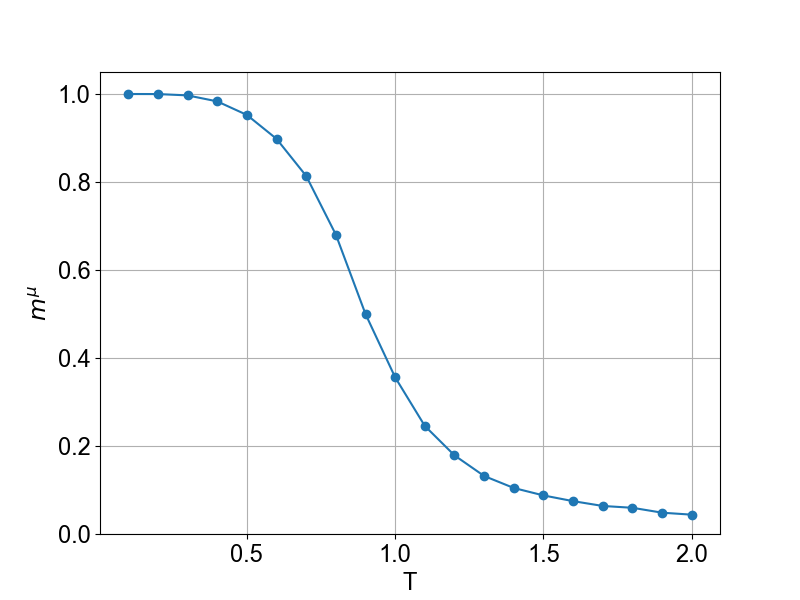

In [38]:
#Grafico overlap en función de T

fig, ax = plt.subplots(1,1, figsize = (8,6))

# ax.errorbar(T_vec, overlap_mean_vec, yerr = overlap_std_vec, fmt = 'o-', capsize = 5)
ax.plot(T_vec, overlap_mean_vec, '-o', color = 'tab:blue')
ax.set_xlabel('T')
ax.set_ylabel(r'$m^\mu$')
ax.set_ylim([0,1.05])
ax.grid()

plt.show()

#Guardo la figura
fig.savefig("ej2_overlap_vs_T.png", bbox_inches='tight')